<a href="https://colab.research.google.com/github/tada20001/NLP_2023/blob/main/CH17_01_NLP%EC%97%90%EC%84%9C%EC%9D%98_%EC%82%AC%EC%A0%84%ED%9B%88%EB%A0%A8(Pre_training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BERT(Bidirectional Encoder Representations from Transformers)를 배우기에 앞서 워드 임베딩에서부터 ELMo, 그리고 트랜스포머에 이르기까지 자연어처리가 발전되어온 흐름 정리함


### 1. 사전 훈련된 워드 임베딩
------------------
앞서 Word2Vec, FastText, GloVe와 같은 워드임베딩 방법론들을 설명함. 


어떤 태스크를 수행할 때, 임베딩을 사용하는 방법으로는 크게 두가지가 있음


* 임베딩을 랜덤 초기화하여 처음부터 학습하는 방법
* 방대한 데이터로 Word2Vec 등과 같은 임베딩 알고리즘으로 사전에 학습된 임베딩 벡터들을 가져와 사용하는 방법 : 만약, 택스크에 사용하기 위한 데이터가 적으면, 사전훈련된 임베딩을 사용하면 성능향상을 기대해 볼 수 있음

그런데 **두가지 방법 모두 하나의 단어가 하나의 벡터값으로 맵핑되므로, 문맥을 고려하지 못하여 다의어나 동음이의어를 구분하지 못하는 문제점**이 있음

한국어에는 '사과'라는 단어가 존재하는데 이 '사과'는 용서를 빈다는 의미로도 쓰이지만, 먹는 과일의 의미로도 사용됨

그러나 임베딩 벡터는 '사과'라는 벡터에 하나의 벡터값을 맵핑하므로 이 두가지 의미를 구분할 수 없었음. 이 한계는 사전 훈련된 언어모델을 사용하므로서 극복할 수 있었으며, 아래에서 언급할 ELMo나 BERT 등이 이러한 문제의 해결책임


### 2. 사전 훈련된 언어 모델
------------------------
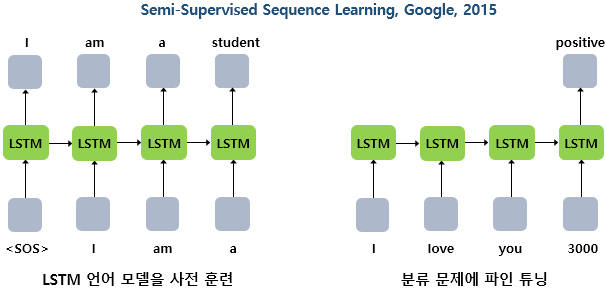

2015년 구글은 'Semi-supervised Sequence Learning'이라는 논문에서 LSTM 언어모델을 학습하고 나서 이렇게 학습한 LSTM을 텍스트 분류에 추가 학습하는 방법을 선보임.

이 방법은 우선 LSTM 언어모델을 학습함. 언어모델은 주어진 텍스트로부터 이전 단어들로부터 다음 단어를 예측하도록 학습하므로 기본적으로 **별도의 레이블을 하지 않은 텍스트 데이터로도 학습이 가능함**.

사전 훈련된 워드 임베딩과 마찬가지로 사전 훈련된 언어모델의 강점은 학습 전 사람이 별도 레이블을 지정해 줄 필요가 없다는 점임

그리고 이렇게 레이블이 없는 데이터로 학습된 LSTM과 가중치가 랜덤으로 초기화된 LSTM 두가지를 두고, 텍스트 분류와 같은 문제를 학습하여 사전 훈련된 언어모델을 사용한 전자의 경우가 더 좋은 성능을 얻을 수 있다는 가능성을 보임

방대한 텍스트로 LSTM 언어모델을 학습해 두고, 언어모델을 다른 태스크에서 높은 성능을 얻기 위해 사용하는 방법으로 이전에 설명한 ELMo와 같은 아이디어도 존재함

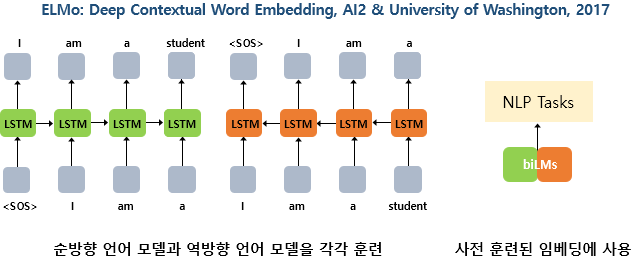

ELMo는 순방향 언어모델과 역방향 언어모델을 각각 따로 학습시킨 후에, 이렇게 사전 학습된 언어모델로부터 임베딩 값을 얻는다는 아이디어였음

이러한 임베딩은 문맥에 따라 임베딩 벡터값이 달라지므로, 기존 워드 임베딩인 Word2Vec나 GloVe 등이 다의어를 구분할 수 없었던 문제를 해결할 수 있었음

이어 언어모델은 RNN 계열의 신경망을 탈피하기 시작함

트랜스포머가 번역기와 같은 인코더-디코더 구조에서 LSTM을 뛰어넘는 좋은 성능을 얻자, LSTM이 아닌 트랜스포머로 사전 훈련된 언어모델을 학습하는 시도가 등장함

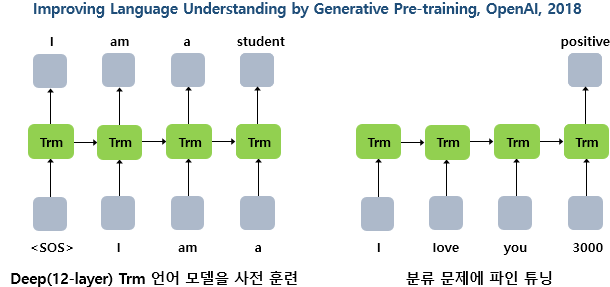

위의 그림에서 Trm은 트랜스포머(Transformer)의 약자임. 트랜스포머의 디코더는 LSTM 언어모델처럼 순차적으로 이전 단어들로부터 다음 단어를 예측함. 

OpenAI는 트랜스포머 디코더로 총 12개의 층을 쌓은 후에 방대한 텍스트 데이터를 학습시킨 언어모델 GPT-1을 만들었음

OpenAI는 GPT-1에 여러 다양한 태스크를 위해 추가 학습을 진행하였을때, 다양한 태스크에서 높은 성능을 얻을 수 있음을 입증함

NLP의 주요 트렌드는 사전 훈련된 언어모델을 만들고 이를 특정 태스크에 추가 학습시켜 해당 태스크에서 높은 성능을 얻는 것으로 접어들었고, 언어 모델의 학습방법에 변화를 주는 모델들이 등장함

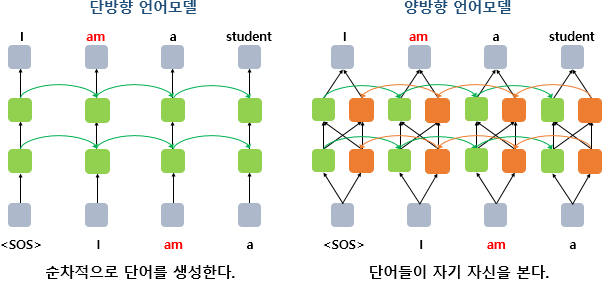

위의 좌측 그림에 있는 단방향 언어모델은 지금까지 배운 전형적인 언어모델임. 시작 토큰 \<sos>가 들어가면, 다음 단어 I를 예측하고 그리고 그 다음 단어 am을 예측함.

그런데 am을 예측할 때, 출력층은 주황색 LSTM 셀인 역방향 언어모델의 정보도 함께 받고 있음. 그리고 am을 예측하는 시점에서 역방향 언어모델이 이미 관측한 단어는 a, am, I 이렇게 3개의 단어임. 


이미 예측해야 하는 단어를 역방향 언어모델을 통해 미리 관측한 셈이므로 언어모델은 일반적으로 양방향으로 구현하지 않음


하지만 언어의 문맥이라는 것은 실제로는 양방향임. 텍스트 분류나 개체명 인식 등에서 양방향 LSTM을 사용하여 모델을 구현해서 좋은 성능을 얻을 수 있었던 것을 상기해 보자.

하지만, 이전 단어들로부터 다음 단어를 예측하는 언어 모델의 특성으로 인해 위의 그림과 같은 양방향 언어모델을 사용할 수 없으므로, 그 대안으로 ELMo에서는 순방향과 역방향의 두개 단방향 언어모델을 따로 준비하여 학습하는 방법을 사용했던 것임


이와 같이 기존 언어모델로는 양방향 구조를 도입할 수 없으므로, 양방향 구조를 도입하기 위해 2018년에 새로운 구조의 언어모델이 탄생하였고, 이것이 마스크드 언어모델임


### 3. 마스크드 언어 모델(Masked Language Model)
-------------------------
마스크드 언어 모델은 입력텍스트의 단어 집합의 15%의 단어를 마스킹함. 


여기서 마스킹이란 원래의 단어가 무엇이었는지 모르게 한다는 뜻임. 그리고 인공신경망에게 이렇게 마스킹된 단어들(Masked words)을 예측하도록 함. 

문장 중간에 구멍을 뚫어 놓고, 구멍에 들어갈 단어들을 예측하게 하는 식임. 